# Experimental

Reverse engineering of the code for clustered centering rings/motor tubes in OpenRocket

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Helper vars
R5 = 1.0 / (2*np.sin(2*np.pi/10))
SQRT2 = np.sqrt(2)
SQRT3 = np.sqrt(3)

# Single row
single_row = {
    1: ("single", 0, 0),
    2: ("double", -0.5, 0, 0.5, 0),
    3: ("3-row", -1.0, 0, 0.0, 0, 1.0, 0),
    4: ("4-row", -1.5, 0, -0.5, 0, 0.5, 0, 1.5, 0),
    9: ("9-grid", -1.4, 1.4, 0, 1.4, 1.4, 1.4, -1.4, 0, 0, 0, 1.4, 0, -1.4, -1.4, 0, -1.4, 1.4, -1.4),
}

# Ring of tubes
ring_tubes = {
    3: ("3-ring", -0.5, -1.0/(2*SQRT3), 0.5, -1.0/(2*SQRT3), 0, 1.0/SQRT3),
    4: ("4-ring", -0.5, 0.5, 0.5, 0.5, 0.5, -0.5, -0.5, -0.5),
    5: ("5-ring", 0, R5, 
        R5*np.sin(2*np.pi/5), R5*np.cos(2*np.pi/5),
        R5*np.sin(2*np.pi*2/5), R5*np.cos(2*np.pi*2/5),
        R5*np.sin(2*np.pi*3/5), R5*np.cos(2*np.pi*3/5),
        R5*np.sin(2*np.pi*4/5), R5*np.cos(2*np.pi*4/5)),
    6: ("6-ring", 0, 1, SQRT3/2, 0.5, SQRT3/2, -0.5, 0, -1, -SQRT3/2, -0.5, -SQRT3/2, 0.5)
}

# Centered with ring
cetered_ring = {
    3: ("3-star", 0, 0, 0, 1, SQRT3/2, -0.5, -SQRT3/2, -0.5),
    4: ("4-star", 0, 0, -1/SQRT2, 1/SQRT2, 1/SQRT2, 1/SQRT2, 1/SQRT2, -1/SQRT2, -1/SQRT2, -1/SQRT2),
    5: ("5-star", 0, 0, 0, 1, 
        np.sin(2*np.pi/5), np.cos(2*np.pi/5),
        np.sin(2*np.pi*2/5), np.cos(2*np.pi*2/5),
        np.sin(2*np.pi*3/5), np.cos(2*np.pi*3/5),
        np.sin(2*np.pi*4/5), np.cos(2*np.pi*4/5)),
    6: ("6-star", 0, 0, 0, 1, SQRT3/2, 0.5, SQRT3/2, -0.5, 0, -1, -SQRT3/2, -0.5, -SQRT3/2, 0.5), 
    9: ("9-star",  0, 0, 1.4, 0, 1.4/SQRT2, -1.4/SQRT2, 0, -1.4, 
         -1.4/SQRT2, -1.4/SQRT2, -1.4, 0, -1.4/SQRT2, 1.4/SQRT2, 0, 1.4, 1.4/SQRT2, 1.4/SQRT2)
}

In [4]:
# Single row
single = np.array([0, 0])
double = np.array([
    [-0.5, 0], 
    [0.5, 0]
    ])
row3 = np.array([
    [-1.0, 0],
    [0, 0], 
    [1.0, 0]
    ])
row4 = np.array([
    [-1.5, 0], 
    [-0.5, 0], 
    [0.5, 0], 
    [1.5, 0]
    ])
grid9 = np.array([
    [-1.4, 1.4], 
    [0, 1.4], 
    [1.4, 1.4], 
    [-1.4, 0], 
    [0, 0], 
    [1.4, 0], 
    [-1.4, -1.4], 
    [0, -1.4], 
    [1.4, -1.4]
    ])

# Ring of tubes
ring3 = np.array([
    [-0.5, -1.0/(2*SQRT3)], 
    [0.5, -1.0/(2*SQRT3)], 
    [0, 1.0/SQRT3]
    ])
ring4 = np.array([
    [-0.5, 0.5], 
    [0.5, 0.5], 
    [0.5, -0.5], 
    [-0.5, -0.5]
    ])
ring5 = np.array([
    [0, R5], 
    [R5*np.sin(2*np.pi/5), R5*np.cos(2*np.pi/5)],
    [R5*np.sin(2*np.pi*2/5), R5*np.cos(2*np.pi*2/5)],
    [R5*np.sin(2*np.pi*3/5), R5*np.cos(2*np.pi*3/5)],
    [R5*np.sin(2*np.pi*4/5), R5*np.cos(2*np.pi*4/5)]
    ])
ring6 = np.array([
    [0, 1], 
    [SQRT3/2, 0.5], 
    [SQRT3/2, -0.5], 
    [0, -1], 
    [-SQRT3/2, -0.5], 
    [-SQRT3/2, 0.5]
    ])

# Centered with ring
star3 = np.array([
    [0, 0], 
    [0, 1], 
    [SQRT3/2, -0.5], 
    [-SQRT3/2, -0.5]
    ])
star4 = np.array([
    [0, 0], 
    [-1/SQRT2, 1/SQRT2], 
    [1/SQRT2, 1/SQRT2], 
    [1/SQRT2, -1/SQRT2], 
    [-1/SQRT2, -1/SQRT2]
    ])
star5 = np.array([
    [0, 0], [0, 1], 
    [np.sin(2*np.pi/5), np.cos(2*np.pi/5)],
    [np.sin(2*np.pi*2/5), np.cos(2*np.pi*2/5)],
    [np.sin(2*np.pi*3/5), np.cos(2*np.pi*3/5)],
    [np.sin(2*np.pi*4/5), np.cos(2*np.pi*4/5)]
    ])
star6 = np.array([
    [0, 0], 
    [0, 1], 
    [SQRT3/2, 0.5], 
    [SQRT3/2, -0.5], 
    [0, -1], 
    [-SQRT3/2, -0.5], 
    [-SQRT3/2, 0.5]
    ])
star9 = np.array([
    [0, 0], 
    [1.4, 0], 
    [1.4/SQRT2, -1.4/SQRT2], 
    [0, -1.4], 
    [-1.4/SQRT2, -1.4/SQRT2], 
    [-1.4, 0], 
    [-1.4/SQRT2, 1.4/SQRT2], 
    [0, 1.4], 
    [1.4/SQRT2, 1.4/SQRT2]
    ])

In [5]:
def packer_plotter(packing, af_diameter):
    %matplotlib notebook
    bnd_circ = plt.Circle((0, 0), af_diameter/2, fill=False)
    packing = packing*af_diameter/2

    fig, ax = plt.subplots()
#     ax.axis('equal')
    plt.autoscale(enable=True)
    ax.add_artist(bnd_circ)
    
    for coord_set in packing:
        x = coord_set[0]
        y = coord_set[1]
        plt.scatter(x, y)
    return True   

<IPython.core.display.Javascript object>


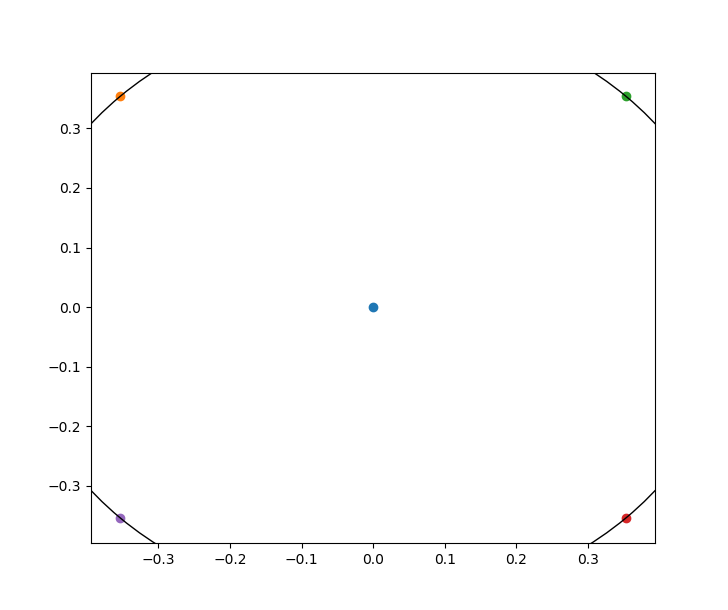

True

In [6]:
packer_plotter(star4, 1)